# Example Notebook for loading in the data

This notebook will show you how to load our raw .fif files into MNE.

Lets load in all the subjects for one task. Let's use 'FlickerOddball' in this example.

## Installation

Make sure you have the provided `neurohack` python environment installed.

Or, at a minimum, ensure you have the following packages installed:

```bash
conda install scipy
conda install mne
```

In [14]:
from pathlib import Path
from glob import glob
import os.path as op
import os
import matplotlib.pyplot as plt
%matplotlib inline

import mne
mne.viz.set_browser_backend('matplotlib')

'matplotlib'

## Pathing
First, we need to point python to the correct place to find the files.

`source_path = op.join('..', 'eeg_data')` makes source_path a relative path to /sample-data/ which in this case is: /sample-data/

In [15]:
tasks = ['FlickerOddball', 'Flicker', 'Oddball'] # Define our three tasks

source_path = op.join('..', 'sample-data') # This is the path to our raw data

# This print statement will show you the entire contents of a given directory. This can be great for troubleshooting!
print(os.listdir(source_path))

['Flicker', 'FlickerOddball', 'Oddball']


# Loading in data

This loop will iterate through tasks and subjects, find the .fif file for that subject and task, load it, and add it to a dictionary for us to use.

This data is loaded in as a [MNE Raw object](https://mne.tools/stable/generated/mne.io.Raw.html).

#### **You don't have to load data in this way**, this is just an example to get you started!

In [16]:
raws_dict = dict() # This will be a dictionary that holds all of our raw data in format {task: {subject: raw_object}}

for task in tasks:
    
    task_dir = op.join(source_path, task) # This is the path to the task directory
    
    all_subjs = sorted([sub.split(os.sep)[-1].split('_')[0] for sub in glob(task_dir + '/' + '*.fif')]) # This is a list comprehension that will find all the subject ids in the `task_dir` directory

    print(f"Subjects found: {all_subjs}")

    for subject in all_subjs:
        
        raws_dict[task] = {} # This will create a dictionary for the task
        
        subject_path = glob(op.join(task_dir + '/' + subject + '*_eeg.fif')) # This is the path to the raw data file
        
        print(f"Reading data from: {subject_path}\n")
        
        # This will read in the raw data and store it in our dictionary
        raws_dict[task][subject] = mne.io.read_raw_fif(subject_path[0],  # Because glob gives us a list, we need to index to the first item (even though there is only one item in the list)
                                                    preload=True, # This line preloads the data into memory for us to use!
                                                    verbose=False
                                                ) 

Subjects found: ['sub-010']
Reading data from: ['..\\sample-data\\FlickerOddball\\sub-010_FlickerOddball_eeg.fif']

Subjects found: ['sub-010']
Reading data from: ['..\\sample-data\\Flicker\\sub-010_Flicker_eeg.fif']

Subjects found: ['sub-010']
Reading data from: ['..\\sample-data\\Oddball\\sub-010_Oddball_eeg.fif']



Lets take a quick look at our dictionary to make sure it loaded correctly!

This looks great! A quick sanity check to ensure that you haven't make a mistake like duplicating the same participant's data repeatedly, is that they will all have slightly different lengths/sizes.

In [17]:
raws_dict # You can access an entire task with raws_dict['task_name'] or a specific subject with raws_dict['task_name']['subject_id']

{'FlickerOddball': {'sub-010': <Raw | sub-010_FlickerOddball_eeg.fif, 33 x 344488 (344.5 s), ~86.8 MiB, data loaded>},
 'Flicker': {'sub-010': <Raw | sub-010_Flicker_eeg.fif, 33 x 233515 (233.5 s), ~58.8 MiB, data loaded>},
 'Oddball': {'sub-010': <Raw | sub-010_Oddball_eeg.fif, 33 x 342532 (342.5 s), ~86.3 MiB, data loaded>}}

# Looking at our data

Let just look at a single subject for now. Here we can see general information about the data such as number of EEG and EOG channels, how long the recording is, the sampling rate, if any filters are applied, etc.
- For more information on the metadata that can be accessed, see the [MNE '.info' documentation](https://mne.tools/stable/generated/mne.Info.html)

In [18]:
raws_dict['FlickerOddball']['sub-010']

<Raw | sub-010_FlickerOddball_eeg.fif, 33 x 344488 (344.5 s), ~86.8 MiB, data loaded>

In [19]:
raws_dict['FlickerOddball']['sub-010'].info['ch_names']

['Fp1',
 'Fp2',
 'F7',
 'F3',
 'Fz',
 'F4',
 'F8',
 'FC5',
 'FC1',
 'FC2',
 'FC6',
 'T7',
 'C3',
 'Cz',
 'C4',
 'T8',
 'TP9',
 'CP5',
 'CP1',
 'CP2',
 'CP6',
 'TP10',
 'P7',
 'P3',
 'Pz',
 'P4',
 'P8',
 'PO9',
 'O1',
 'Oz',
 'O2',
 'PO10',
 'HEOG']

## Events

Lets take a closer look at the events from one of our subjects! 
Events are like flags that we plant in the data when something of interest occurs in the stimulus paradigm.
- `events` are the numbers associated with the markers in the data. This is an array of shape (n_events, 3) -> (event_sample, 0, event_number); the middle column is typically always 0.
- `event_id`: are the (human-readable) strings associated to the events. This is a dictionary of {event_string: event_num}

**For more information on the events for each condition in this dataset, please refer to the `dataset_description.md` file in the hackathon repository!**

For more general information, check out MNE Events Tutorials
- [Working with events](https://mne.tools/stable/auto_tutorials/raw/20_event_arrays.html)

In [20]:
events, event_id = mne.events_from_annotations(raws_dict['FlickerOddball']['sub-010'],  # This will extract the events from the raw data
                                               verbose = False)

print(f"Our event_id dictionary:")

event_id

Our event_id dictionary:


{np.str_('FlickerOddball/block_0/block_end'): 1,
 np.str_('FlickerOddball/block_0/nontarget/loc_1/freq_10'): 2,
 np.str_('FlickerOddball/block_0/nontarget/loc_2/freq_12'): 3,
 np.str_('FlickerOddball/block_0/nontarget/loc_3/freq_10.43'): 4,
 np.str_('FlickerOddball/block_0/nontarget/loc_4/freq_11.43'): 5,
 np.str_('FlickerOddball/block_0/nontarget/loc_5/freq_10.91'): 6,
 np.str_('FlickerOddball/block_0/target/loc_0/freq_12.63'): 7,
 np.str_('FlickerOddball/block_1/block_end'): 8,
 np.str_('FlickerOddball/block_1/nontarget/loc_0/freq_12.63'): 9,
 np.str_('FlickerOddball/block_1/nontarget/loc_1/freq_10'): 10,
 np.str_('FlickerOddball/block_1/nontarget/loc_2/freq_12'): 11,
 np.str_('FlickerOddball/block_1/nontarget/loc_3/freq_10.43'): 12,
 np.str_('FlickerOddball/block_1/nontarget/loc_4/freq_11.43'): 13,
 np.str_('FlickerOddball/block_1/target/loc_5/freq_10.91'): 14,
 np.str_('FlickerOddball/block_2/block_end'): 15,
 np.str_('FlickerOddball/block_2/nontarget/loc_0/freq_12.63'): 16,
 np.st

Here we can see our events with important things like 'target' and 'nontarget' markers!

Below, we can see the first 15 events in our data. The first column is the sample number, and the third column is the event type.
- For example, the first event is a '5' which, if we compare to the above event_id dictionary, corresponds to 'FlickerOddball/block_0/nontarget/loc_1/freq_10'

In [21]:
print(f"The first 15 items in our events array:")

events[:15]

The first 15 items in our events array:


array([[33646,     0,     5],
       [34407,     0,     3],
       [35167,     0,     6],
       [35929,     0,     7],
       [36688,     0,     2],
       [37449,     0,     4],
       [38210,     0,     2],
       [38970,     0,     6],
       [39731,     0,     3],
       [40492,     0,     7],
       [41252,     0,     4],
       [42013,     0,     5],
       [42773,     0,     7],
       [43534,     0,     2],
       [44295,     0,     5]])

Lets quickly plot our raw data with events!

On the y-axis are the channels, x-axis the time. Each vertical line represents an event marker at that sample in the data. At the top are the event_id strings, but there are too many so they overlap. In general this doesn't tell us much more than 1. our data loaded in correctly, and 2. it needs to be cleaned as there is a lot of noise.

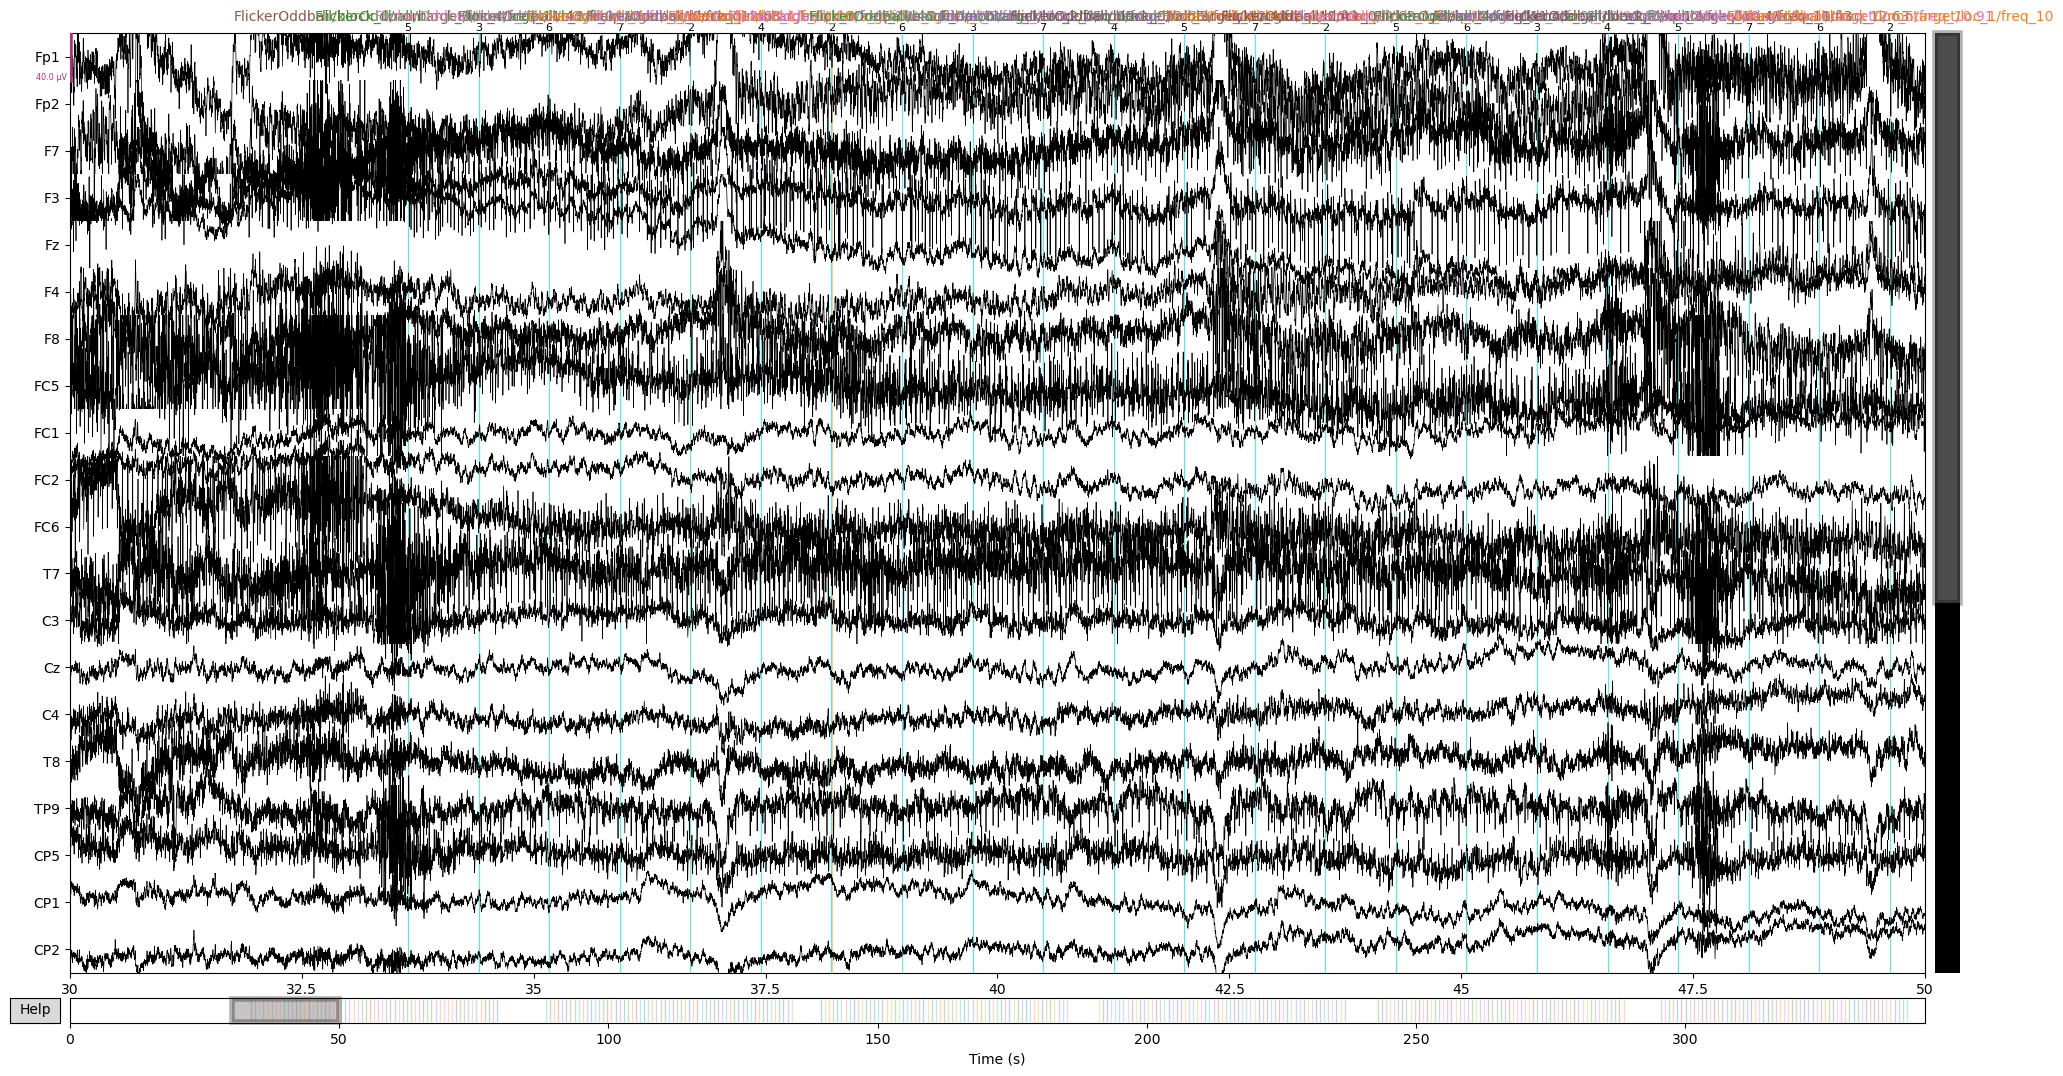

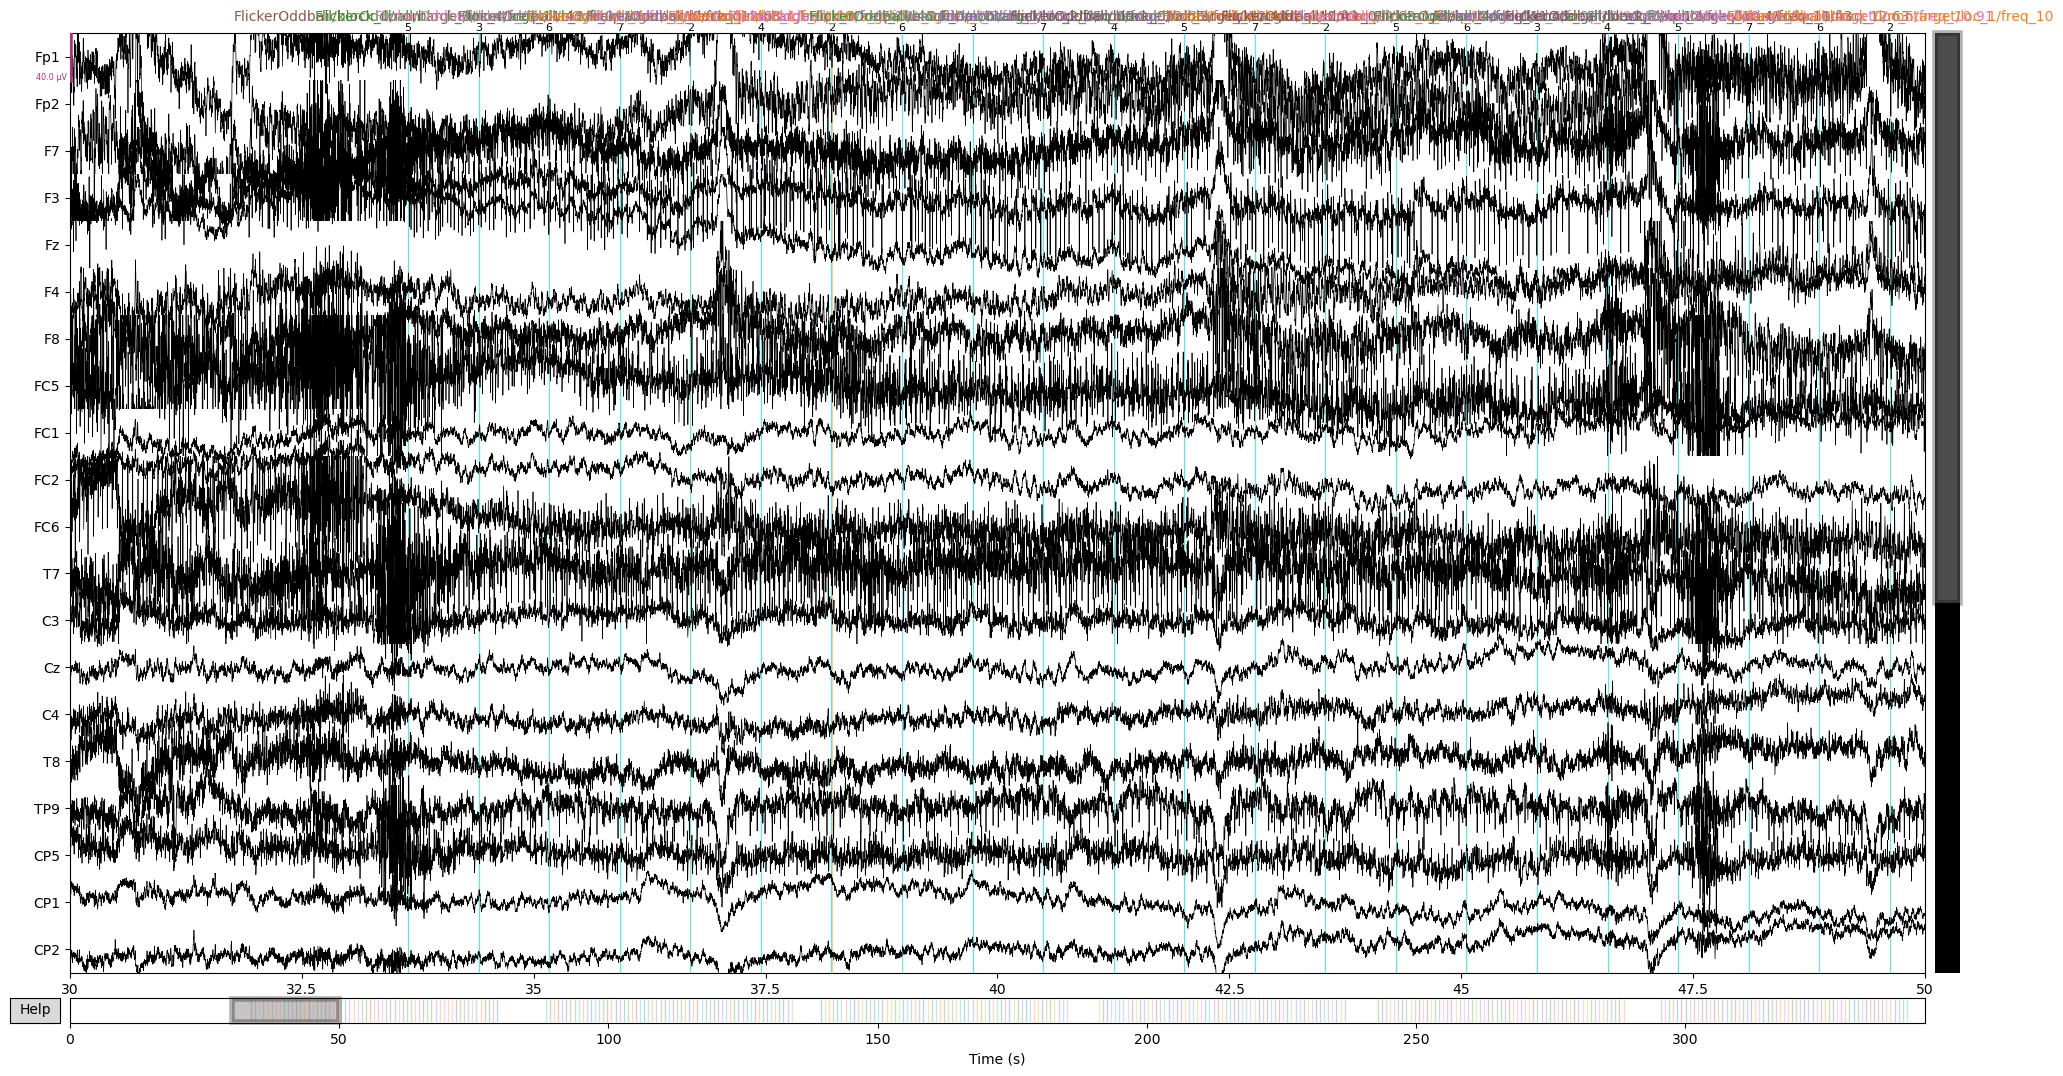

In [22]:
raws_dict['FlickerOddball']['sub-010'].plot( # This will plot from 30 into our recording for 20 seconds (50 seconds total) of our raw data for selected task and subject
    events = events,
    start = 30,
    duration = 20
)